In [0]:
import sys
sys.version_info

sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)

In [0]:
import platform
platform.platform()

'Linux-4.19.104+-x86_64-with-Ubuntu-18.04-bionic'

In [0]:
import matplotlib.image as mpimg
import numpy as np
from skimage.morphology import remove_small_objects
from skimage.morphology import binary_opening, binary_closing, square
from skimage.morphology import skeletonize
import math
import glob

path = "/gdrive/My Drive/ColabNote/BAS-HW01-Fingerprints/*"
file_list = sorted(glob.glob(path))
test_file_list = [file for file in file_list if file.endswith("(1).bmp") or file.endswith("(2).bmp")]
train_file_list = [file for file in file_list if file not in test_file_list]

test_file_list

def cnvalue(sklist, i, j):  #해당 p점을 기준으로 cn값을 계산해주는 함수
    p = sklist[i][j]
    cn = 0
    if p == 1:              #p==1일때만 CN계산이 의미있기 때문에!
        plist = []          #받아온 p값을 기준으로, plist에 순서대로, p, p1, p2, p3.., p9(==p1)을 삽입
        plist.append(sklist[i][j])
        plist.append(sklist[i + 1][j]), plist.append(sklist[i + 1][j + 1]), plist.append(sklist[i][j + 1]),
        plist.append(sklist[i - 1][j + 1]), plist.append(sklist[i - 1][j]), plist.append(sklist[i - 1][j - 1]),
        plist.append(sklist[i][j - 1]), plist.append(sklist[i + 1][j - 1]), plist.append(sklist[i + 1][j])  # p9 == p1
        cn0 = 0               #cn값을 구하기 위한 임시변수
        for i in range(1, 9): #for 문을 이용하여 |p1-p2|+...+|p8-p9|값을 c0 에 저장
            cn0 += abs(int(plist[i]) - int(plist[i + 1]))
        cn = 0.5 * cn0  # 구한 c0값에서, 모든 pn값들은 2번씩 더해지기 때문에, 0.5를 곱하여 cn 값을 구함
    else:
        pass
    return cn

def make_cnlist(filelist, finallist):
    for file in filelist:
        img = mpimg.imread(file)
        img_bin = np.zeros((144, 144))
        threshold = 127
        img_bin[img <= threshold] = 1
        img_bin[img > threshold] = 0
        for i in range(144):           #외곽부분을 1->0으로 수정하는 부분
            for j in range(144):
                if i<20 or i>=120 or j<20 or j>=120 :
                    img_bin[i][j] = 0
                else : 
                    continue
        #img_bin = img_bin.astype(np.bool) #remove객체를 하기 위해서 필요한 형변환
        #img_removed = remove_small_objects(img_bin, 50, connectivity=1) #50
        img_o = binary_opening(img_bin, square(3))
        img_c = binary_closing(img_o, square(3))
        sk = skeletonize(img_c)
        #sk=skeletonize(img_removed)
        cnlist = []
        for i in range(2, 144):
            for j in range(2, 144):
                p = sk[i][j]
                cn = cnvalue(sk, i, j)
                if  cn == 1 :         # 단점(cn==1)일 경우, 해당 특징점을 cnlist에 추가
                    cnlist.append((i, j, cn))             
        finallist.append(cnlist)      # 각 지문에 대해 구한 특징점들을 finallist에 추가

test_cnlist = []
train_cnlist = []
make_cnlist(test_file_list, test_cnlist)
make_cnlist(train_file_list, train_cnlist)

for i in range(16):
    print(len(test_cnlist[i]))
    print(test_cnlist[i])



98
[(23, 35, 1.0), (25, 72, 1.0), (25, 117, 1.0), (28, 113, 1.0), (29, 36, 1.0), (29, 54, 1.0), (29, 112, 1.0), (30, 35, 1.0), (30, 62, 1.0), (30, 75, 1.0), (31, 82, 1.0), (32, 66, 1.0), (33, 30, 1.0), (33, 98, 1.0), (34, 48, 1.0), (35, 112, 1.0), (36, 112, 1.0), (37, 104, 1.0), (38, 103, 1.0), (38, 118, 1.0), (39, 81, 1.0), (39, 117, 1.0), (43, 50, 1.0), (44, 29, 1.0), (44, 38, 1.0), (44, 111, 1.0), (48, 32, 1.0), (49, 109, 1.0), (50, 58, 1.0), (53, 49, 1.0), (54, 68, 1.0), (54, 73, 1.0), (55, 84, 1.0), (56, 83, 1.0), (58, 30, 1.0), (59, 30, 1.0), (59, 60, 1.0), (60, 39, 1.0), (60, 71, 1.0), (61, 83, 1.0), (62, 46, 1.0), (62, 82, 1.0), (63, 57, 1.0), (63, 93, 1.0), (64, 92, 1.0), (65, 66, 1.0), (66, 37, 1.0), (67, 35, 1.0), (70, 31, 1.0), (70, 106, 1.0), (71, 105, 1.0), (73, 46, 1.0), (73, 79, 1.0), (74, 34, 1.0), (75, 109, 1.0), (76, 73, 1.0), (79, 24, 1.0), (80, 115, 1.0), (82, 117, 1.0), (85, 104, 1.0), (86, 43, 1.0), (86, 81, 1.0), (87, 31, 1.0), (87, 52, 1.0), (89, 29, 1.0), (89,

In [0]:
def distance(point1, point2):      #거리를 구하는 공식
    distance = math.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)
    return distance
 
def matching(cnlist1, cnlist2, mth, dth):   #매칭률을 구하는 함수
    cnt = 0
    for i in range(len(cnlist1)):
        for j in range(len(cnlist2)):
            d = distance(cnlist1[i], cnlist2[j])
            if d <= mth:
                cnt += 1
    allcount = len(cnlist1) * len(cnlist2)
    mr = (cnt / allcount) * 100 # 매칭률 = (매칭된 특정점의 수 / 모든 비교 횟수) * 100
    if mr >= dth:
        return 1 # pass 했을 경우 1을 return
    else:
        return 0

def verification(cnlist_t, num, train_cnlist, mth, dth): #test_list 하나의 샘플 지문, num은 test_cnlist에서의 지문번호
    dnt_mine = 0 # 내것과 동일한 지문 중에서 통과된 것의 수
    dnt_other = 0 # 내것과 다른 지문 중에서 통과된 것의 수 
    for number, cnlist in enumerate(train_cnlist):      
        if matching(cnlist_t, cnlist, mth, dth) == 1 :
            if num == ((number//8)+1) : #지문이 동일한 것인지 확인
                dnt_mine +=1
            else :
                dnt_other +=1
    FRR = ((8 - dnt_mine)/8)*100   #본인 지문 8개 대비 통과 안된 경우의 수
    FAR = (dnt_other/56)*100       #타인 지문 56개 대비 통과된 경우의 수
    return [FRR, FAR] #하나의 샘플 지문에 대한 FRR, FAR값

def calculation(final, mth, dth):
    avg_FRR = 0
    avg_FAR = 0
    for i in range(len(test_cnlist)) :
        num = (i // 2) + 1 #해당 test 지문이 몇번째 지문인지 알려주는 번호
        v = verification(test_cnlist[i], num, train_cnlist, mth, dth)
        avg_FRR += v[0]
        avg_FAR += v[1]
    avg_FRR /= 16
    avg_FAR /= 16
    final.append([avg_FRR, avg_FAR])

#mth가 변할때, dth에 따른 FRR,FAR 값 출력
mth10 = []
mth30 = []
mth50 = []
mth70 = []
mth100 = []

dth = [10, 30, 50, 70, 90]  
for i in dth:
    calculation(mth10, 10, i)
    calculation(mth30, 30, i)
    calculation(mth50, 50, i)
    calculation(mth70, 70, i)
    calculation(mth100, 100, i)
    
print(mth10),print(mth30),print(mth50), print(mth70),print(mth100)

[[100.0, 0.0], [100.0, 0.0], [100.0, 0.0], [100.0, 0.0], [100.0, 0.0]]
[[0.0, 100.0], [87.5, 2.790178571428571], [100.0, 0.0], [100.0, 0.0], [100.0, 0.0]]
[[0.0, 100.0], [0.0, 100.0], [39.84375, 56.36160714285714], [90.625, 0.0], [100.0, 0.0]]
[[0.0, 100.0], [0.0, 100.0], [0.0, 100.0], [14.0625, 84.59821428571428], [98.4375, 0.0]]
[[0.0, 100.0], [0.0, 100.0], [0.0, 100.0], [0.0, 100.0], [0.0, 100.0]]


(None, None, None, None, None)

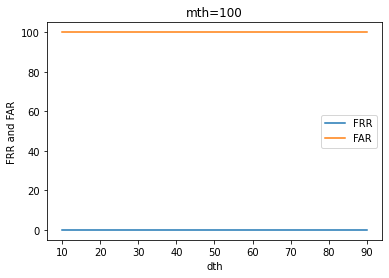

In [0]:
#mth, dth에 따른 차트
from matplotlib import pyplot as plt
plt.plot(dth, mth100)
plt.title('mth=100'), plt.xlabel('dth'), plt.ylabel('FRR and FAR'), plt.legend(['FRR', 'FAR'])
plt.show()

#mth, dth에 따른 표
from pandas import Series, DataFrame
import pandas as pd
df =  pd.DataFrame(mth100, columns=['FRR','FAR'], index = dth)
print('mth = 100 일때, dth에 따른 FRR, FAR')
df

In [0]:
def matching_rate(cnlist1, cnlist2, mth):  #매칭률 반환해주는 함수
    cnt = 0
    for i in range(len(cnlist1)):
        for j in range(len(cnlist2)):
            d = distance(cnlist1[i], cnlist2[j])
            if d <= mth:
                cnt += 1
    allcount = len(cnlist1) * len(cnlist2)
    mr = (cnt / allcount) * 100 # 매칭률 = (매칭된 특정점의 수 / 모든 비교 횟수) * 100
    return mr

id = [[0]*67 for i in range(16)]
def identification(test_cnlist, train_cnlist, mth):
    for i in range(len(test_cnlist)):
        for j in range(len(train_cnlist)):  #i번째 행의 matching rate을 다 계산
            id[i][j] = matching_rate(test_cnlist[i], train_cnlist[j], mth) #매칭률 계산해서 저장

        maxvalue = id[i][0]  
        maxindex = 0
        for j in range(64):          #계산된 matching rate중에 가장 큰 것을 찾음
            if maxvalue < id[i][j] :
                maxvalue = id[i][j]   #가장 매칭률이 클 때의 매칭률과, 그때의 인덱스를 저장
                maxindex = j
        id[i][64] = maxvalue
        id[i][65] = (maxindex //8) +1
        if ((i//2)+1) == ((maxindex //8) +1) : 
            id[i][66] = 1             #두 지문의 ID가 동일할때
        else:
            id[i][66] = 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


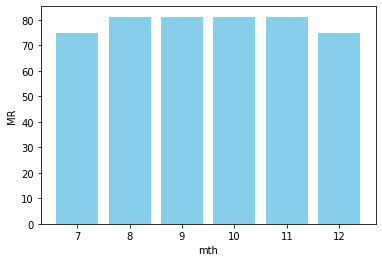

[75.0, 81.25, 81.25, 81.25, 81.25, 75.0]


In [0]:
#mth에 따른 매칭률 비교 차트
from matplotlib import pyplot as plt
mth = ["10", "30", "50", "70", "100"]
mr = []
for j in mth:
    identification(test_cnlist, train_cnlist, int(j))
    cnt = 0
    for i in range(16):
        if id[i][66] ==1:
            cnt+=1
    MR = (cnt/16)*100
    mr.append(MR)
plt.bar(mth, mr, color='skyblue')
ax = plt.subplot()
ax.set_xticklabels(mth)
plt.xlabel('mth'), plt.ylabel('MR')
plt.show()
print(mr)


In [0]:
#mth별 두 지문간의 특징점 매칭률 표
from pandas import Series, DataFrame
import pandas as pd
id = [[0]*67 for i in range(16)]
identification(test_cnlist, train_cnlist, 7)
it = [10, 3, 4, 5, 6, 7, 8, 9]
index_columns=[]
index_row =[]
for i in range(1, 9):
    for j in it:
        index_columns.append(str(i)+'('+str(j)+')')
index_columns.append('max 매칭률')
index_columns.append('해당 ID')
index_columns.append('본인여부')
for i in range(1, 9):
    for j in range(1,3):
        index_row.append(str(i)+'('+str(j)+')')
df =  pd.DataFrame(id, columns=index_columns, index=index_row)
print(df)

         1(10)      1(3)      1(4)      1(5)  ...      8(9)   max 매칭률  해당 ID  본인여부
1(1)  1.537071  1.510204  1.360544  1.290516  ...  1.616954  1.717272      4     0
1(2)  2.163115  3.341772  3.023910  3.090097  ...  1.811100  3.341772      1     1
2(1)  2.594937  2.300000  2.256944  2.352941  ...  1.461538  4.062500      2     1
2(2)  2.505274  2.194444  2.083333  2.175245  ...  1.634615  4.340278      2     1
3(1)  1.459419  1.474510  1.437908  1.470588  ...  1.484163  1.885813      5     0
3(2)  1.403081  1.526104  1.506024  1.523742  ...  1.316033  2.396543      3     1
4(1)  1.338156  1.447619  1.468254  1.386555  ...  1.538462  3.623693      4     1
4(2)  1.210787  0.985507  0.905797  0.831202  ...  2.006689  3.499470      4     1
5(1)  1.898734  1.916667  1.875000  1.930147  ...  1.384615  2.481618      5     1
5(2)  1.602057  2.020833  1.801215  1.907169  ...  1.466346  2.780331      5     1
6(1)  1.079672  0.666667  0.694444  0.735294  ...  1.538462  2.654232      4     0
6(2)